## Air Quality Index Prediction

Import dependencies.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Load data from csv file to pandas dataframe. 

In [2]:
air_quality_data = pd.read_csv('AirQualityUCI.csv')

In [3]:
air_quality_data.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


We specify the separator to be ";" and not ",". Furthermore, numbers should be represented with decimal point and not with comma.

In [4]:
air_quality_data = pd.read_csv('AirQualityUCI.csv', sep=";", decimal=",")

In [5]:
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


Remove the last two "Unnamed" columns.

In [6]:
air_quality_data = air_quality_data.iloc[ :, :-2]
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
air_quality_data.shape

(9471, 15)

According to dataset [description](https://archive.ics.uci.edu/ml/datasets/Air+Quality), there are 9358 instances. Hence, index 9356 is the last data point in the dataframe, the rest are null rows (this because labels row is included and row index count begins at 0) to discard.

In [9]:
air_quality_data.loc[[9356]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [10]:
air_quality_data.loc[[9357]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
air_quality_data = air_quality_data.head(9357)
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


Get some info about the data.

In [12]:
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


Checking the number of missing values.

In [13]:
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Apparently there are no missing values... but it is not true, however. The actual missing values are tagged with "-200" (once again, this is from the [description](https://archive.ics.uci.edu/ml/datasets/Air+Quality) page).

In [14]:
air_quality_data.isin([-200]).sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

### Handling missing values

* Convert all "-200" values to NaN.
* Replace each NaN with the mean of that column.

In [15]:
air_quality_data = air_quality_data.replace(to_replace=-200, value=np.NaN)

The real numbers of missing values are the following.

In [16]:
air_quality_data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [17]:
air_quality_data.mean()

CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

In [18]:
air_quality_data = air_quality_data.fillna(air_quality_data.mean())
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


### Forecasting with FB Prophet algorithm

FB Prophet documentation: https://facebook.github.io/prophet/docs/quick_start.html.
From the documentation:

"The input to Prophet is always a dataframe with two columns: `ds` and `y`. The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The `y` column must be numeric, and represents the measurement we wish to forecast."


Convert the date format DD/MM/YYYY to YYYY-MM-DD.

In [19]:
data_info = pd.to_datetime(air_quality_data['Date']) 

In [20]:
data_info.tail()

9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, dtype: datetime64[ns]

In [21]:
time_info = air_quality_data['Time']

In [22]:
time_info

0       18.00.00
1       19.00.00
2       20.00.00
3       21.00.00
4       22.00.00
          ...   
9352    10.00.00
9353    11.00.00
9354    12.00.00
9355    13.00.00
9356    14.00.00
Name: Time, Length: 9357, dtype: object

Replace dots with colons in 'Time' column.

In [23]:
time_info = time_info.apply(lambda x: x.replace(".", ":"))

In [24]:
time_info

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object

In [25]:
print(type(data_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Combine the two series above in a single pandas dataframe.

In [26]:
date_time = pd.concat([data_info, time_info], axis=1) 

In [27]:
date_time.head()

,Date,Time
0,2004-10-03,18:00:00
1,2004-10-03,19:00:00
2,2004-10-03,20:00:00
3,2004-10-03,21:00:00
4,2004-10-03,22:00:00


In [28]:
date_time.shape

(9357, 2)

Combining date and time.

In [29]:
date_time['ds'] = date_time['Date'].astype(str) + " " + date_time['Time'].astype(str)

In [30]:
date_time.head()

,Date,Time,ds
0,2004-10-03,18:00:00,2004-10-03 18:00:00
1,2004-10-03,19:00:00,2004-10-03 19:00:00
2,2004-10-03,20:00:00,2004-10-03 20:00:00
3,2004-10-03,21:00:00,2004-10-03 21:00:00
4,2004-10-03,22:00:00,2004-10-03 22:00:00


In [31]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


Convert ds from "object" datatype to "datatime" format.

In [32]:
data = pd.DataFrame()

In [33]:
data['ds'] = pd.to_datetime(date_time['ds'])

In [34]:
data.head()

,ds
0,2004-10-03 18:00:00
1,2004-10-03 19:00:00
2,2004-10-03 20:00:00
3,2004-10-03 21:00:00
4,2004-10-03 22:00:00


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 73.2 KB


The y column must be numeric, and represents the measurement we wish to forecast.

In [36]:
data['y'] = air_quality_data['RH']

In [37]:
data.head()

,ds,y
0,2004-10-03 18:00:00,48.9
1,2004-10-03 19:00:00,47.7
2,2004-10-03 20:00:00,54.0
3,2004-10-03 21:00:00,60.0
4,2004-10-03 22:00:00,59.6


In [38]:
from prophet import Prophet

Training the Prophet model.

In [39]:
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -230.717


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12834.2     0.0174104       310.803           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       12848.2    0.00131632       260.235   5.355e-06       0.001      234  LS failed, Hessian reset 
     199       12853.3    0.00223958       156.797           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       12855.6   0.000365226       152.511   2.586e-06       0.001      382  LS failed, Hessian reset 
     297       12857.7   0.000239449       94.5703   1.941e-06       0.001      483  LS failed, Hessian reset 
     299       12857.7   0.000276316       78.3499           1           1      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     343       12857.8   0.000549902  

You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe`. 

In [40]:
future = model.make_future_dataframe(periods=365, freq='H')
future.tail()

,ds
9717,2005-12-19 00:00:00
9718,2005-12-19 01:00:00
9719,2005-12-19 02:00:00
9720,2005-12-19 03:00:00
9721,2005-12-19 04:00:00


In [41]:
forecast = model.predict(future)

`yhat` is the predicted value.

In [42]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9717,2005-12-19 00:00:00,59.512430,42.633348,77.243755
9718,2005-12-19 01:00:00,60.891416,43.975703,79.566618
9719,2005-12-19 02:00:00,61.969988,43.997907,79.557349
9720,2005-12-19 03:00:00,62.758234,44.847973,79.239998
9721,2005-12-19 04:00:00,63.542184,46.129724,81.020943


You can plot the forecast by calling the `Prophet.plot` method and passing in your forecast dataframe.

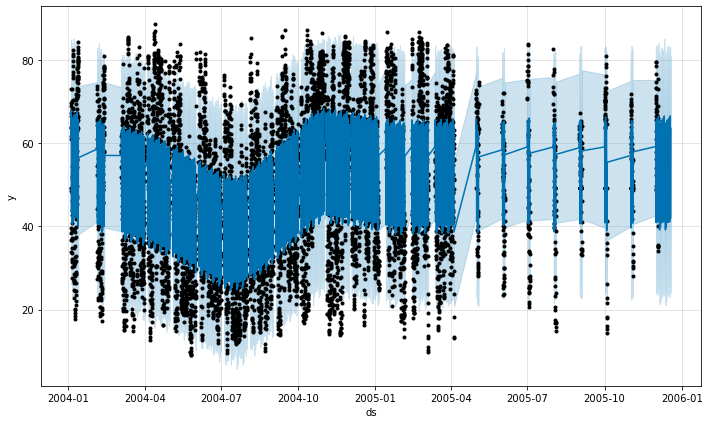

In [43]:
fig1 = model.plot(forecast)

Use the `Prophet.plot_components` method to see the forecast components. By default you’ll see the trend, weekly seasonality, and hourly seasonality of the time series.

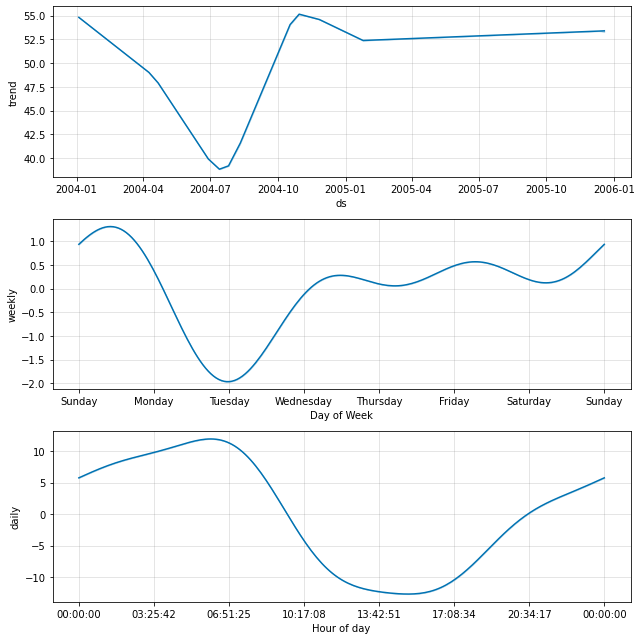

In [44]:
fig2 = model.plot_components(forecast)